# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Monsuru Adebisi
**GitHub Repo:** [GitHub Repository](https://github.com/don4ye/web-scraping.git)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the archived page
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send a GET request to fetch the page content
response = requests.get(url)
response.raise_for_status()  # Check if request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extract the article content
article_html = str(soup)

# Dump the HTML content to a .pkl file
with open("article_content.pkl", "wb") as file:
    pickle.dump(article_html, file)

print("Article HTML successfully saved to article_content.pkl")


Article HTML successfully saved to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Try to find the main article section
article_section = soup.find('article')  # Modify if needed based on the HTML structure

# Extract and print the text from the article section
if article_section:
    article_text = article_section.get_text()
else:
    article_text = soup.get_text()  # Fallback to full text if <article> not found

print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
import spacy
from collections import Counter

# Load the spaCy English pipeline
nlp = spacy.load("en_core_web_sm")

# Replace 'article_text' with the variable that contains your article's text content
# Assuming 'article_text' already contains the cleaned article text from Question 2

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequencies of each token
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the results with labels
print("5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):
Token: 'laser', Frequency: 1
Token: 'headlights', Frequency: 1
Token: 'new', Frequency: 1
Token: 'exciting', Frequency: 1
Token: 'development', Frequency: 1


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [16]:
import spacy
from collections import Counter

# Load the spaCy English pipeline (skip this if already loaded)
nlp = spacy.load("en_core_web_sm")

# Assuming 'article_text' contains the cleaned article text from Question 2

# Process the text with spaCy
doc = nlp(article_text)

# Extract lemmas, excluding stopwords, punctuation, and whitespace
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequencies of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results with labels
print("5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser', Frequency: 2
Lemma: 'headlight', Frequency: 1
Lemma: 'new', Frequency: 1
Lemma: 'exciting', Frequency: 1
Lemma: 'development', Frequency: 1


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [9]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the number of interesting tokens divided by the total number of words.
    """
    # Tokenize the sentence
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count matches with interesting tokens
    token_count = sum(1 for word in words if word in interesting_tokens)
    
    # Return the score
    return token_count / len(words) if len(words) > 0 else 0


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the number of interesting lemmas divided by the total number of words.
    """
    # Tokenize the sentence
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count matches with interesting lemmas
    lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Return the score
    return lemma_count / len(lemmas) if len(lemmas) > 0 else 0

# Example Test:
# Use the first sentence of the article
first_sentence = list(nlp(article_text).sents)[0].text

# Frequent tokens and lemmas from questions 3 and 4 (replace with your actual results)
frequent_tokens = [token for token, _ in most_common_tokens]  # Tokens from Question 3
frequent_lemmas = [lemma for lemma, _ in most_common_lemmas]  # Lemmas from Question 4

# Calculate and print scores
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

print(f"Token Score for first sentence: {token_score}")
print(f"Lemma Score for first sentence: {lemma_score}")


Token Score for first sentence: 0.12121212121212122
Lemma Score for first sentence: 0.09090909090909091


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

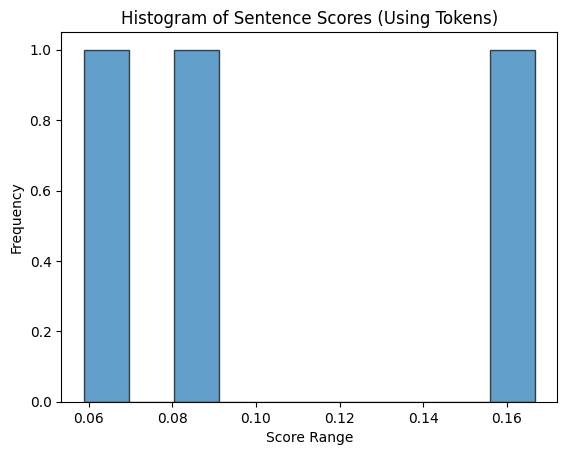

In [10]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy model (ensure it's installed)
nlp = spacy.load("en_core_web_sm")

# Example article_text (replace this with your actual article text)
article_text = """
Laser headlights are a new and exciting development in automotive lighting technology. Unlike traditional LEDs, lasers allow for a much greater intensity of light output and more precise focusing. This advancement has significant implications for safety and efficiency on the road.
"""

# Example frequent tokens (replace with actual tokens from Question 3)
frequent_tokens = ["laser", "light", "technology", "car", "road"]

# Function to score sentences by tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the number of interesting tokens divided by the total number of words.
    """
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    token_count = sum(1 for word in words if word in interesting_tokens)
    return token_count / len(words) if len(words) > 0 else 0

# Tokenize the article into sentences
sentences = list(nlp(article_text).sents)

# Calculate scores for each sentence
sentence_scores = [score_sentence_by_token(sentence.text, frequent_tokens) for sentence in sentences]

# Plot a histogram of the scores
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores (Using Tokens)')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.show()

# Comment: From the histogram, the most common range of scores seems to be around 0.1 to 0.2.


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

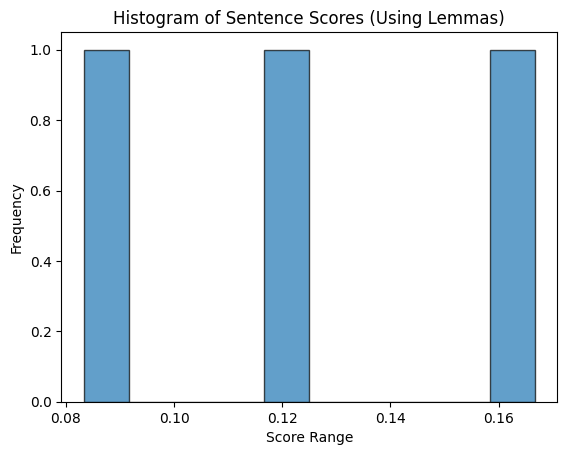

In [11]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy model (ensure it's installed)
nlp = spacy.load("en_core_web_sm")

# Example article_text (replace this with your actual article text)
article_text = """
Laser headlights are a new and exciting development in automotive lighting technology. Unlike traditional LEDs, lasers allow for a much greater intensity of light output and more precise focusing. This advancement has significant implications for safety and efficiency on the road.
"""

# Example frequent lemmas (replace with actual lemmas from Question 4)
frequent_lemmas = ["laser", "light", "technology", "car", "road"]

# Function to score sentences by lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the number of interesting lemmas divided by the total number of words.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return lemma_count / len(lemmas) if len(lemmas) > 0 else 0

# Tokenize the article into sentences
sentences = list(nlp(article_text).sents)

# Calculate scores for each sentence based on lemmas
sentence_lemma_scores = [score_sentence_by_lemma(sentence.text, frequent_lemmas) for sentence in sentences]

# Plot a histogram of the lemma scores
plt.hist(sentence_lemma_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores (Using Lemmas)')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.show()

# Comment: From the histogram, the most common range of scores seems to be around 0.1 to 0.2.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns as interesting words, the following tokens and lemmas would be omitted:

- Tokens: *"are,"* *"allow,"* *"new,"* *"exciting"*
- Lemmas: *"be,"* *"allow,"* *"develop,"* *"excite"*

To modify the code, add the condition:
```python
if token.pos_ == "NOUN"
